In [1]:
from bycycle.features import compute_features
from bycycle.burst import plot_burst_detect_params
from neurodsp.filt import filter_signal
import util
from config import config_dict

import h5py
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Load shanks and choose recordings

In [2]:
# Choose recording to load
df_shanks = util.create_shank_df(drop_no_neu=False)
df_plt = df_shanks.groupby('rat').first().reset_index()

# Plot example burst detection for each rat

/gh/bv/bycycle/bycycle/filt.py:62: UserWarning: 
            No filter length provided. Using default of 3 cycles of the
            low cutoff frequency.
            
  ''')


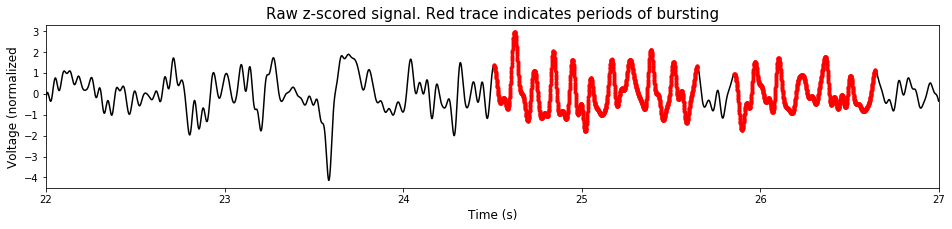

/gh/bv/bycycle/bycycle/filt.py:62: UserWarning: 
            No filter length provided. Using default of 3 cycles of the
            low cutoff frequency.
            
  ''')


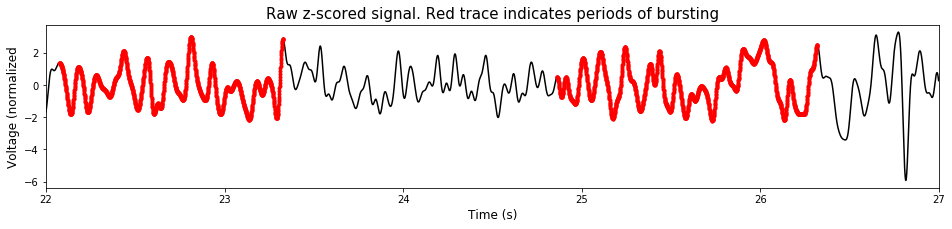

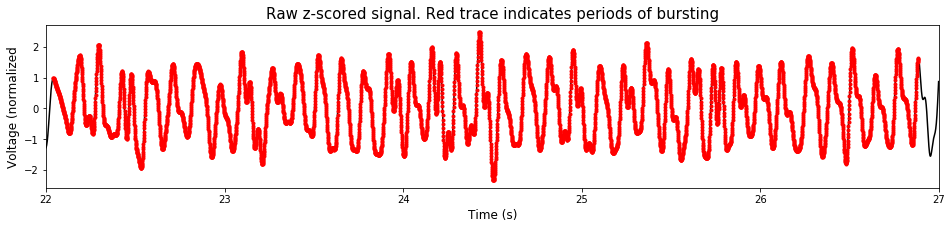

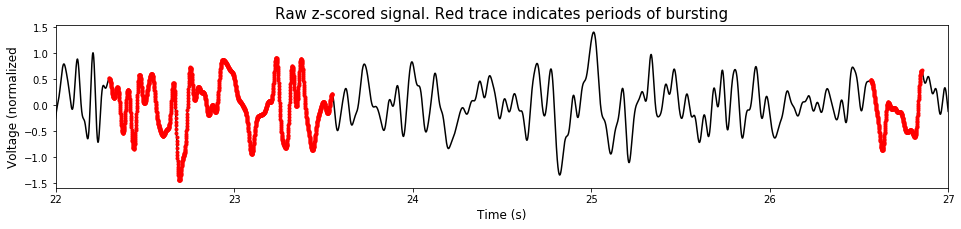

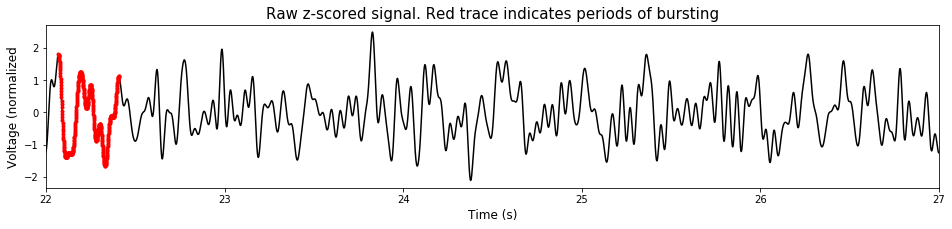

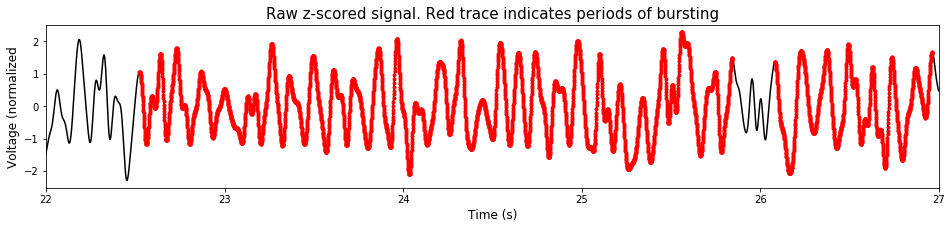

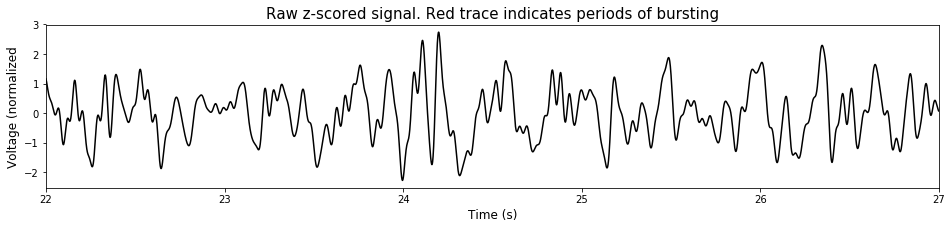

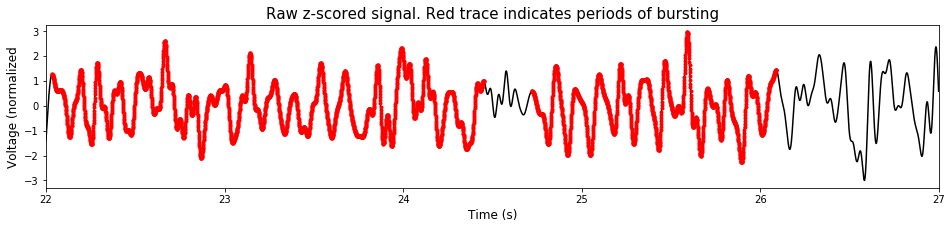

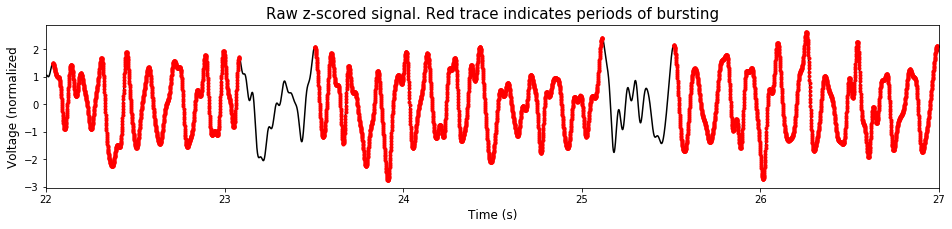

In [3]:
for i, row in df_plt.iterrows():

    # Load LFP
    lfp_filename = config_dict['mat_path'] + '/' + row['rat'] + '/' + row['sess'] + '/' + row['sh'] + '/' + 'lfp' + str(row['elec']) + '.mat'
    f = h5py.File(lfp_filename)
    lfp = np.array(f['lfp']).T[0]
    
    # Only consider first 2 minute
    lfp = lfp[:int(row['Fs'] * 60 * 2)]

    # Broad bandpass filter of LFP
    lfp = filter_signal(lfp, row['Fs'], 'lowpass', config_dict['cf_low'], n_seconds=config_dict['N_seconds_low'], 
                        compute_transition_band=False, remove_edge_artifacts=False)
    lfp = filter_signal(lfp, row['Fs'], 'highpass', config_dict['cf_high'], n_seconds=config_dict['N_seconds_high'],
                        compute_transition_band=False, remove_edge_artifacts=False)
    
    # Compute shape features
    df = compute_features(lfp, row['Fs'], config_dict['f_range'],
                          center_extrema=config_dict['extrema_center'],
                          burst_detection_method = 'amp',
                          burst_detection_kwargs={'amp_threshes': (.5, 1),
                                                  'N_cycles_min': config_dict['burst_kwargs_list'][0]['N_cycles_min']})
    
    ax = plot_burst_detect_params(lfp, row['Fs'], df, config_dict['burst_kwargs_list'][0], tlims=(22, 27),
                         plot_only_result=True)
    plt.show()